<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>
<h1 style="text-align: center;"><b>Домашнее задание. Решение конкурса на Kaggle</b></h1>

Это домашнее задание посвящено полноценному решению задачи бинарной классификации. Основная цель - предсказать отток клиентов телеком-компании.

Есть две части этого домашнего задания:

### Отправить ваши предсказания в Stepik.
За прохождение определенных порогов будут начисляться баллы. Эта часть оценивается из 5 баллов.

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на две части.
* `train.csv`. На этом наборе данных вам необходимо создать и обучить модель. Подробное описание файла есть в ноутбуке.
* `test.csv`. В каждой строчке файла `test.csv` указаны признаки тестовых объектов. Предсказания для этого набора необходимо записать в файл submission.csv и сдать в соответствующий шаг на Stepik. Количество попыток ограничено 100 штук.

Отправлять в Stepik вы будете файл с ответами `my_submission.csv`. В этом файле вам необходимо для каждого объекта из датасета предсказать вероятность класса 1. Мы подготовили для вас файл с примером посылки `submission.csv`. Ваш файл должен быть оформлен таким же образом. В ноутбуке есть пример оформления файла посылки. Для отправки файла с предсказаниями на Stepik есть отдельный шаг.

### Сделать полноценный отчет о вашей работе.
Опишите, как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов. В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается из 10 баллов.

**Вторая часть будет проверяться в формате peer-review. Т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.**

### Контест на Kaggle
Для вашего удобства мы подготовили [контест на Kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/). Тестирующая система на Kaggle выдает те же баллы, что и Stepik. Мы рекомендуем в качестве основной тестирующей системы использовать именно Kaggle, а затем сдать лучшую посылку на Stepik. Так вы привыкните работать с Kaggle.

Проблема для российских пользователей Kaggle заключается в том, что подтверждение аккаунта по номеру телефона работает с перебоями или не работает вообще. Без подтвержденного номера телефона вы не сможете совершать посылки в kaggle. Если у вас возникла такая проблема, мы советуем следующие шаги:
* Попробовать зарегистрировать аккаунт с аутентификацией через gmail. В таком случае, аккаунт должен работать без подтверждения номера телефона.
* Если у вас есть не российский номер, используйте его для верификации аккаунта.
* Если на номер телефона не приходит смс для верификации аккаунта, обратитесь в службу поддержки kaggle. Они с переменным успехом умеют подтверждать аккаунты вручную.
* Если все же подтвердить аккаунт и получить доступ к сдаче заданий не удалось, используйте только сдачу в Stepik.

### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


Данные: [train.csv](https://drive.google.com/file/d/1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K/view?usp=share_link),
[test.csv](https://drive.google.com/file/d/1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r/view?usp=share_link), [submission.csv](https://drive.google.com/file/d/199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y/view?usp=share_link).

Если ссылки на данные не работают, их можно скачать [на Kaggle](https://www.kaggle.com/competitions/advanced-dls-spring-2021/data).

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендации снижайте 1 балл.

**Если решение верное, но не удовлетворяет вашим эстетическим предпочтениям, за это баллы снижать не нужно.**

## Подготовка данных
Первым шагом загрузим данные и проведем их первичный анализ.

In [23]:
# Загрузка библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [ ]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  
# train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  
# test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  
# submission.csv

### Первичный анализ данных
Проверим структуру данных, типы признаков и наличие пропусков.

In [16]:
# Просмотр случайных 5 строк
train.sample(5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
3664,52,50.95,2610.65,Female,0,Yes,Yes,Yes,No,DSL,No,No,Yes,No,No,No,One year,Yes,Bank transfer (automatic),0
1052,57,84.50,4845.4,Female,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,0
3389,3,40.15,130.75,Male,0,No,No,No,No phone service,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Mailed check,1
4303,50,104.95,5222.35,Female,1,No,No,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,0
3802,61,88.65,5321.25,Female,0,No,No,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [17]:
# Проверка типов данных и пропусков
print("Информация о тренировочных данных:")
train.info()

print("\nИнформация о тестовых данных:")
test.info()

Информация о тренировочных данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      52

**Наблюдения:**
- Столбец TotalSpent имеет тип object, требуется преобразование в числовой формат
- В TotalSpent присутствуют пропуски (9 в train, 2 в test)

### Предобработка данных
Создадим пайплайн для обработки числовых и категориальных признаков.

In [25]:
# Определение списков признаков
num_features = ['ClientPeriod', 'MonthlySpending', 'TotalSpent']
cat_features = ['Sex', 'IsSeniorCitizen', 'HasPartner', 'HasChild', 'HasPhoneService', 
                'HasMultiplePhoneNumbers', 'HasInternetService', 'HasOnlineSecurityService',
                'HasOnlineBackup', 'HasDeviceProtection', 'HasTechSupportAccess',
                'HasOnlineTV', 'HasMovieSubscription', 'HasContractPhone',
                'IsBillingPaperless', 'PaymentMethod']

# Создание пайплайна
def preprocess_dataframe(X):
    X = X.copy()
    # Заменяем пробелы на NaN в числовых колонках
    X[num_features] = X[num_features].replace(' ', np.nan)
    # Конвертируем числовые колонки в float
    X[num_features] = X[num_features].astype(float)
    return X

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('space cleaner', FunctionTransformer(preprocess_dataframe)),
            ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
            ('scaler', StandardScaler())]), num_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))]), cat_features)
    ])



## Анализ и визуализация данных

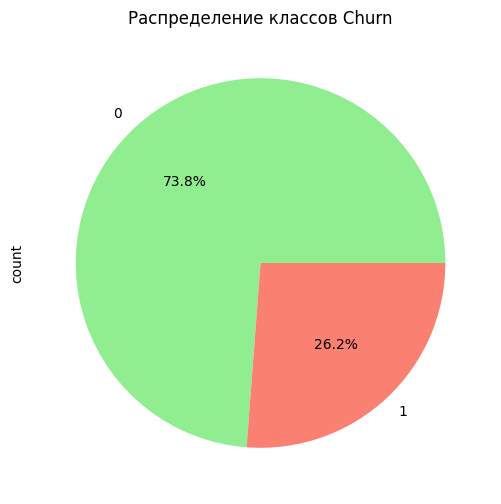

In [26]:
# Распределение целевой переменной
plt.figure(figsize=(6,6))
train['Churn'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightgreen', 'salmon'])
plt.title('Распределение классов Churn')
plt.show()

**Вывод:** Классы умеренно несбалансированы (73.5% vs 26.5%), рекомендуется использовать ROC-AUC в качестве метрики.

## Построение модели

In [27]:
# Создание итогового пайплайна
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegressionCV(
        Cs=[100, 10, 1, 0.1, 0.01],
        cv=5,
        scoring='roc_auc',
        max_iter=1000,
        class_weight='balanced'
    ))
])

# Разделение данных
X = train.drop('Churn', axis=1)
y = train['Churn']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели
pipeline.fit(X_train, y_train)

# Оценка качества
val_pred = pipeline.predict_proba(X_val)[:,1]
print(f'Validation ROC-AUC: {roc_auc_score(y_val, val_pred):.4f}')

Validation ROC-AUC: 0.8259


## Создание сабмишена

In [30]:
# Генерация предсказаний
test_pred = pipeline.predict_proba(test)[:,1]

# Сохранение результатов
submission = pd.DataFrame({'Id': test.index, 'Churn': test_pred})
submission.to_csv('my_submission.csv', index=False)